In [4]:
from scipy.signal import chirp
import matplotlib.pyplot as plt
import numpy as np


Text(0.5, 0, 't (sec)')

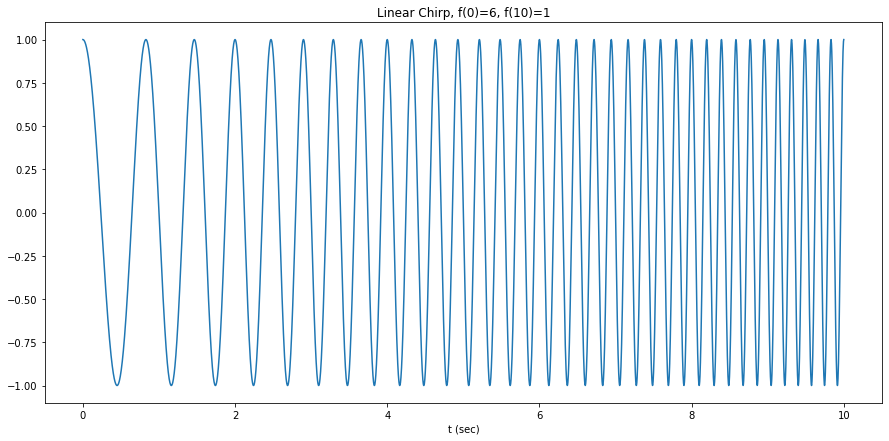

In [30]:
# Generation of data

n_seconds = 10
sampling_rate = 500
window_length = 1 * sampling_rate  # 1 sec
time = np.linspace(0, n_seconds, n_seconds * sampling_rate + 1)
signal = chirp(time, f0=6, f1=1, t1=10, method='linear')
signal = np.flip(signal)  # reverse
n_signal = len(signal)
window_onsets = np.arange(0, n_signal - window_length, window_length)
hz_welch = np.linspace(0, sampling_rate / 2, int(np.floor(window_length / 2) + 1))

plt.figure(figsize=(15, 7))
plt.plot(time, signal)
plt.title("Linear Chirp, f(0)=6, f(10)=1")
plt.xlabel('t (sec)')


Text(0.5, 1.0, 'Time-Frequency domain')

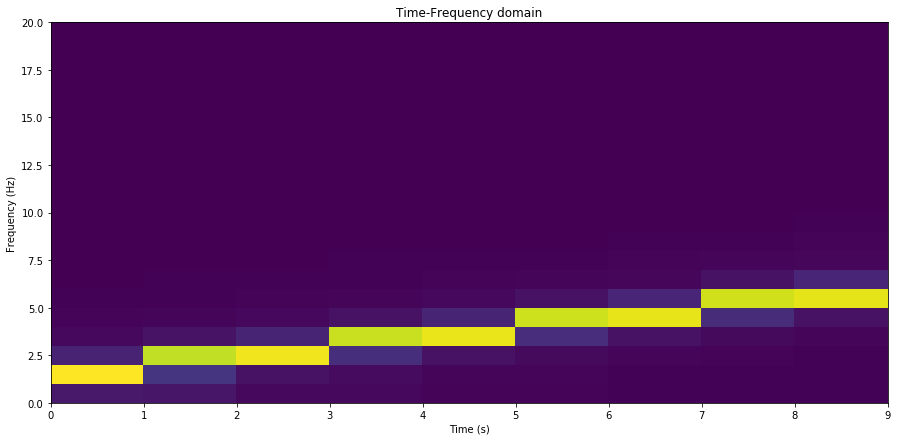

In [31]:
epochs = np.zeros((n_seconds, len(hz_welch)))
for i in range(len(window_onsets)):
    epoch = signal[window_onsets[i]:window_onsets[i] + window_length]
    temp_epoch_power = abs(np.fft.fft(epoch) / window_length) ** 2
    epochs[i] = temp_epoch_power[0:len(hz_welch)]
epochs = epochs.T

plt.figure(figsize=(15, 7))
plt.pcolormesh(np.arange(0, n_seconds), hz_welch, epochs)
plt.xlabel('Time (s)'), plt.ylabel('Frequency (Hz)')
plt.ylim([0, 20])
plt.title('Time-Frequency domain')
